#開始

In [ ]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
#files = glob.glob('/content/*.csv')
files = os.listdir('/content')
for file in files:
  print(file)

.config
4-7min 417um 550rpm.csv
24102902btmlettr.csv(z) (3).csv
sample_data


### グラフ表示

In [ ]:
file_name = "4-7min 417um 550rpm.csv" # @param {type:"string"}
t = 0 # @param {type:"number"}
#0.4152
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, 0]], axis=1)
df = df - t
df[(df<=0)] = 0

m = df.median().median()#df[(df>=m-w)&(df<=m+w)] = m
#df.to_csv(file_name+'(z).csv', index=False)
#df = df - m

4-7min 417um 550rpm.csv.png
0.54541
(46, 92)


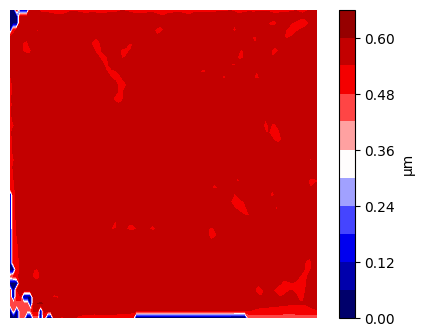

In [ ]:
#x = 0.005 # @param {type:"number"}
#df[(df<=-x)] = -x##df = df.iloc[3:-2, 4:-4]df[0,0] = -x
#df[(df>=m+x)] = m+x
#df[(df<=m-x)] = m-x
color = "seismic" # @param {type:"string"}
l = 10 # @param {type:"number"}
cmap = plt.get_cmap(color)
plt.figure(figsize=(5, 4))
w=0.005
x=0.05

plt.contourf(df.values,cmap=cmap,levels=l)
plt.colorbar(label='µm')#plt.axis('scaled')
#plt.imshow(df.values,aspect=1,cmap=cmap)
plt.axis("off")
plt.xticks(np.arange(0, df.shape[1], 5))
plt.yticks(np.arange(0, df.shape[0], 5))

#plt.grid()
print(file_name+".png")
print(m)
print(df.shape)
plt.show()

In [ ]:
#df[(df>=m-w)&(df<=m+w)] = m
df.iloc[0,0] = m-x
df.iloc[0,1] = m+x
df[(df>=m+x)] = m+x
df[(df<=m-x)] = m-x

### 収率計算

In [ ]:
w=0.003
p = df.iloc[6:-6,6:-6][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[6:-6,6:-6].size
#p = df.iloc[6:-6,9:-9][(df>=-w)&(df<=w)].count().sum() /df.iloc[6:-6,9:-9].size
print(p)

0.8318367346938775


In [ ]:
df.to_csv(file_name+'(z).csv', index=False)


### memo

In [ ]:
dfa = pd.DataFrame(index=np.arange(10), columns=np.arange(10))
for i in range(10):
    for j in range(10):
        max=df.iloc[i*5:i*5+4, j*10:j*10+9].max().max()
        min=df.iloc[i*5:i*5+4, j*10:j*10+9].min().min()
        men=df.iloc[i*5:i*5+4, j*10:j*10+9].mean().mean()
        dfa.iloc[i, j] = (max-min)/men

<ipython-input-58-f3f39e829217>:7: RuntimeWarning: invalid value encountered in scalar divide
  dfa.iloc[i, j] = (max-min)/men


In [ ]:
dfa = pd.DataFrame(index=np.arange(10), columns=np.arange(15))
for i in range(10):
    for j in range(15):
  #      dfa.iloc[i, j] = df.iloc[i*3+2:i*3+4, j*250:j*250+300][(df > 0.07)].median().median()
        dfa.iloc[i, j] = df.iloc[i*3+2:i*3+4, j*312:j*312+400][(df > 0.07)].median().median()

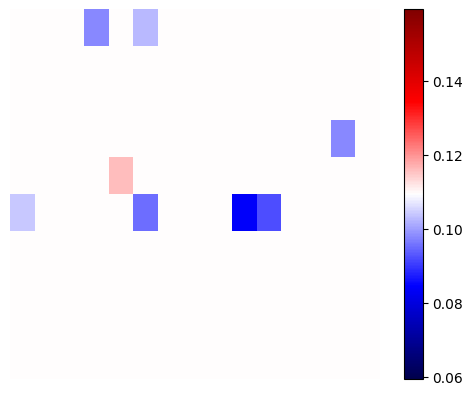

In [ ]:
dfa = dfa.fillna(0).replace([np.inf, -np.inf], 0)
dfa = dfa.apply(pd.to_numeric, errors='coerce').fillna(0)
m=dfa.median().median()
w=0.005
x=0.05
dfa[(dfa>=m-w)&(dfa<=m+w)] = m

color = "seismic"
cmap = plt.get_cmap(color)
plt.imshow(dfa.values,aspect=1.5,cmap=cmap,vmin=m-x, vmax=m+x)
plt.colorbar()

plt.axis("off")
plt.show()

In [ ]:
print(dfa)
dfa.to_csv(file_name+'(z).csv', index=False)
#fig.savefig("img.png",transparent=True)

         0         1         2         3         4         5         6   \
0    0.1089  0.108595   0.11067   0.09785   0.11275  0.102735   0.10902   
1   0.10621   0.10859  0.108655   0.10896   0.10872   0.11052   0.11043   
2   0.10768  0.111035  0.110365   0.11067   0.11055  0.108655  0.108973   
3   0.10487  0.108195   0.10975   0.10982   0.11342  0.113113   0.11238   
4   0.10469   0.10728   0.10994   0.10982    0.1158   0.10463  0.112745   
5   0.10414   0.10676   0.10682   0.10597  0.111325   0.09532   0.10667   
6   0.10609   0.10737  0.109875  0.109935   0.10597   0.11061   0.10969   
7   0.10829   0.10798   0.11027   0.11006   0.11073   0.11079   0.10945   
8  0.107405   0.10811   0.10881   0.10841   0.10963   0.11226   0.11104   
9   0.10603   0.10914   0.10832   0.10823   0.10768   0.10737   0.10963   

        7         8         9         10       11        12        13  \
0  0.10713  0.110395   0.10792    0.1064  0.10817  0.106278   0.10896   
1  0.10994   0.10884   0.108

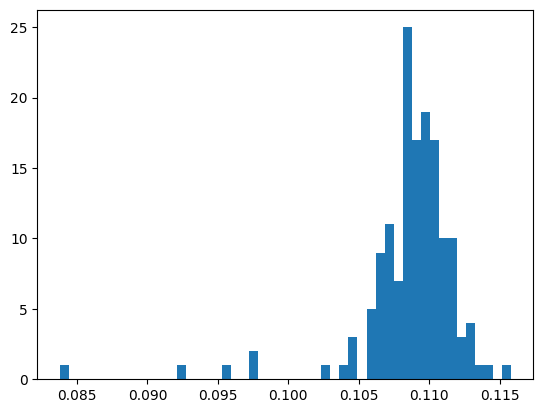

0.08378000000000002 0.11580000000000001 0.10939000000000004


In [ ]:
plt.hist(dfa.values.flatten(), bins=50)#,range=(0.08,0.12)
plt.show()
print(dfa.min().min(),dfa.max().max(),dfa.median().median())

## 収率

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = df.index.values
Y = df.columns.values
Z = df.values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(Y, X, Z, 100, cmap='seismic')
ax.set_ylim(X.min(),X.max())
ax.set_xlim(0,120)
plt.show()

差分

In [ ]:
file_name = "240930-2.csv" # @param {type:"string"}
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)

file_name = "240930-2-dev.csv" # @param {type:"string"}
t = 0.733 # @param {type:"number"}
x = 0.05 # @param {type:"number"}
dfb=df
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)
df=dfb-df+t
df[(df>x)] = x
df[(df<0)] = 0

In [ ]:
df = df.iloc[8:75, 10:110]
#df = df.iloc[:, :-11]
#pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size#pinn = df.iloc[9:120,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120, 9:120].size#pinn = df.iloc[4:60,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,9:120].size
##
pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pall = df.iloc[2:63,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[2:63,9:120].size
##
pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
#pinn = df.iloc[4:60,19:110][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,19:110].size
##pall =round(pall*100,1)pinn =round(pinn*100,1)
#df.iloc[2:63,9:120]=m-x
#df.iloc[4:60,19:110]=m+x
###
##pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
##pall =round(pall*100,1)
##pinn =round(pinn*100,1)
#plt.title(str(pall)+" %", loc='right', color='darkgreen')
#plt.title(str(pinn)+" %", loc='center', color='black')

In [ ]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('bwr')
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())

im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_title(str(pall)+" %", loc='right', color='darkgreen')
ax.set_title(str(pinn)+" %", loc='center', color='black')
print(file_name+".png")
plt.show()

In [ ]:
df[(df>=m-w)&(df<=m+w)] = m
#df.iloc[23:41, 41:59] = m
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
#ax.grid()
#ax.set_ylim(10, 140)#ax.set_xlim(-65,65)
print(file_name+".png")
#fig.colorbar(im)
plt.show()#

等高線

In [ ]:
fig, ax = plt.subplots()

norm = mcolors.Normalize(vmin=m-x, vmax=m+x)
cmap = plt.get_cmap('bwr')
im = ax.imshow(df, cmap=cmap, norm=norm)
#plt.figure(figsize=(5, 4))
#ax.set_xticks(np.arange(0, 131, step=10))
#ax.set_yticks(np.arange(0, 131, step=10))
for i in range(0, 14, 13):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2],linestyle = "--", color='darkgreen', linewidth=2)
for j in range(0, 21, 20):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='darkgreen', linewidth=2)
for i in range(1, 12, 10):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2],linestyle = "--", color='black', linewidth=2)
for j in range(1, 20, 18):
    plt.plot([(130-95)/2, 104],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='black', linewidth=2)

plt.show()